### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Importing Dataset

In [2]:
df = pd.read_csv("./Dataset/Hotel Reservations.csv")


In [3]:
df.head(5)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Shape of our data

In [4]:
df.shape


(36275, 19)

### Dropping the Booking_ID column as it doesen't going to add weight to predict

In [5]:
df.drop(["Booking_ID"], inplace=True, axis="columns")


In [6]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [7]:
df.shape


(36275, 18)

### Checking for missing values and duplicate values

In [8]:
(df.isnull().sum() / len(df)) * 100


no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [9]:
df.duplicated().sum()


10275

In [10]:
df[df.duplicated()]


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
20,2,0,2,2,Meal Plan 1,0,Room_Type 1,99,2017,10,30,Online,0,0,0,65.00,0,Canceled
154,2,0,0,1,Meal Plan 2,0,Room_Type 1,55,2018,4,6,Offline,0,0,0,104.00,0,Not_Canceled
272,2,0,1,2,Meal Plan 2,0,Room_Type 1,161,2018,3,25,Online,0,0,0,130.00,0,Canceled
301,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Online,0,0,0,130.00,0,Canceled
319,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,8,18,Online,0,0,0,115.00,1,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36261,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
36263,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36267,2,0,1,0,Not Selected,0,Room_Type 1,49,2018,7,11,Online,0,0,0,93.15,0,Canceled
36268,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled


### Dropping those duplicates

In [11]:
df = df.drop_duplicates()


In [12]:
df.shape


(26000, 18)

In [13]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Encoding categorical values

#### Getting categorical values

In [14]:
categorical = []
for feature in list(zip(df.dtypes.index, df.dtypes)):
    if feature[1] == "object":
        categorical.append(feature[0])


In [15]:
print(categorical)


['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [16]:
from sklearn.preprocessing import LabelEncoder
for i in categorical:
    j = LabelEncoder()
    df[i] = j.fit_transform(df[i])

In [17]:
df.head()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0


In [18]:
df.dtypes


no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

### Checking if the dataset is imbalanced

In [19]:
df["booking_status"].value_counts()


booking_status
1    18558
0     7442
Name: count, dtype: int64

#### Visualizing counts for target column

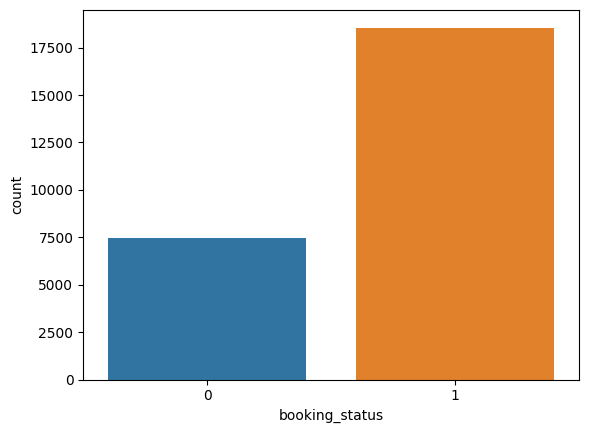

In [20]:
sns.countplot(data=df, x="booking_status")
plt.show()


#### Checking the imbalance ration already we can see it's huge

In [21]:
majority_class_samples = df["booking_status"].loc[df["booking_status"] == 1]
minority_class_samples = df["booking_status"].loc[df["booking_status"] == 0]
Imbalance_Ratio = len(majority_class_samples) / len(minority_class_samples)
print(f"Imbalance Ratio is:{Imbalance_Ratio}")


Imbalance Ratio is:2.4936844934157483


The problem with imbalance is when model will predict the minority will get dominated by the majority. We will ovbiously have to make our dataset balance later.

### Checking for outlier

We will consider removing outliers after train and test split as it will work as remedy for data leakage. I will consider using winsorize method as it will not remove those outlier instead it will replace those outlier values with the percentile range we will define. 

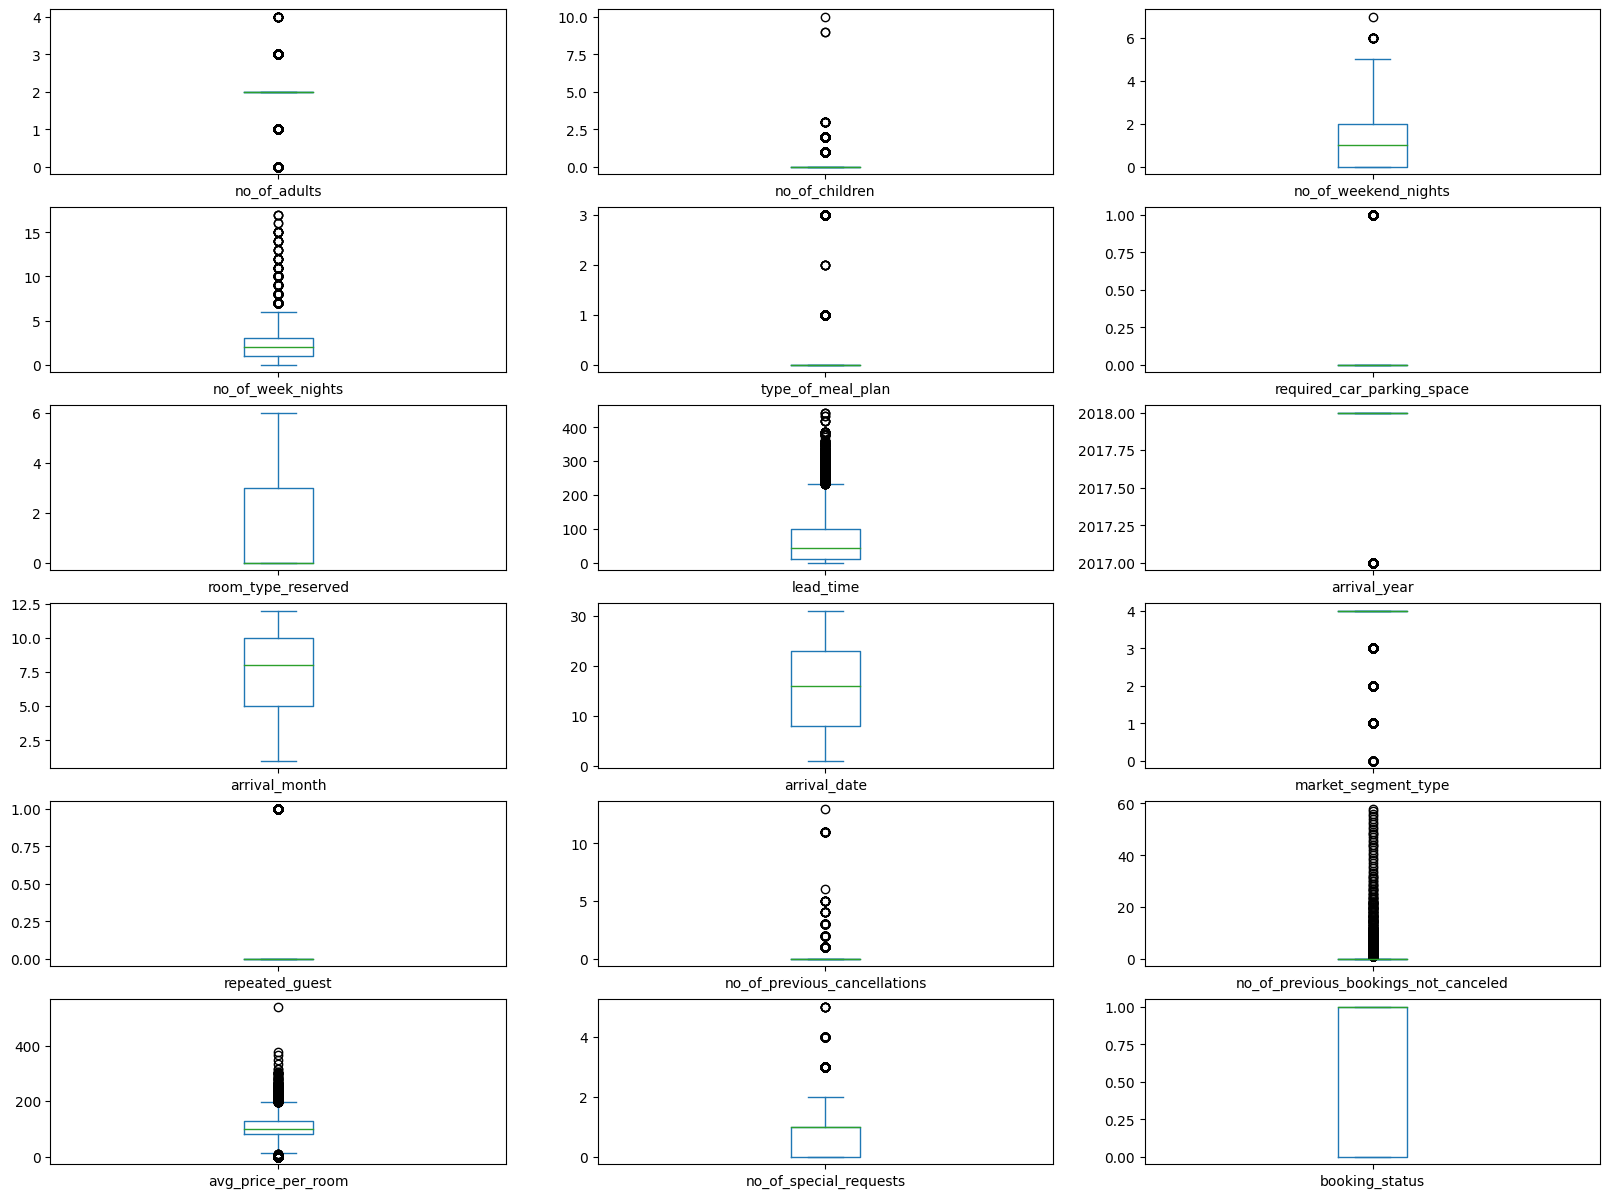

In [22]:
df.plot(
    kind="box",
    subplots=True,
    layout=(6, 3),
    sharey=False,
    sharex=False,
    figsize=(20, 15),
)
plt.show()


### Checking Correlation

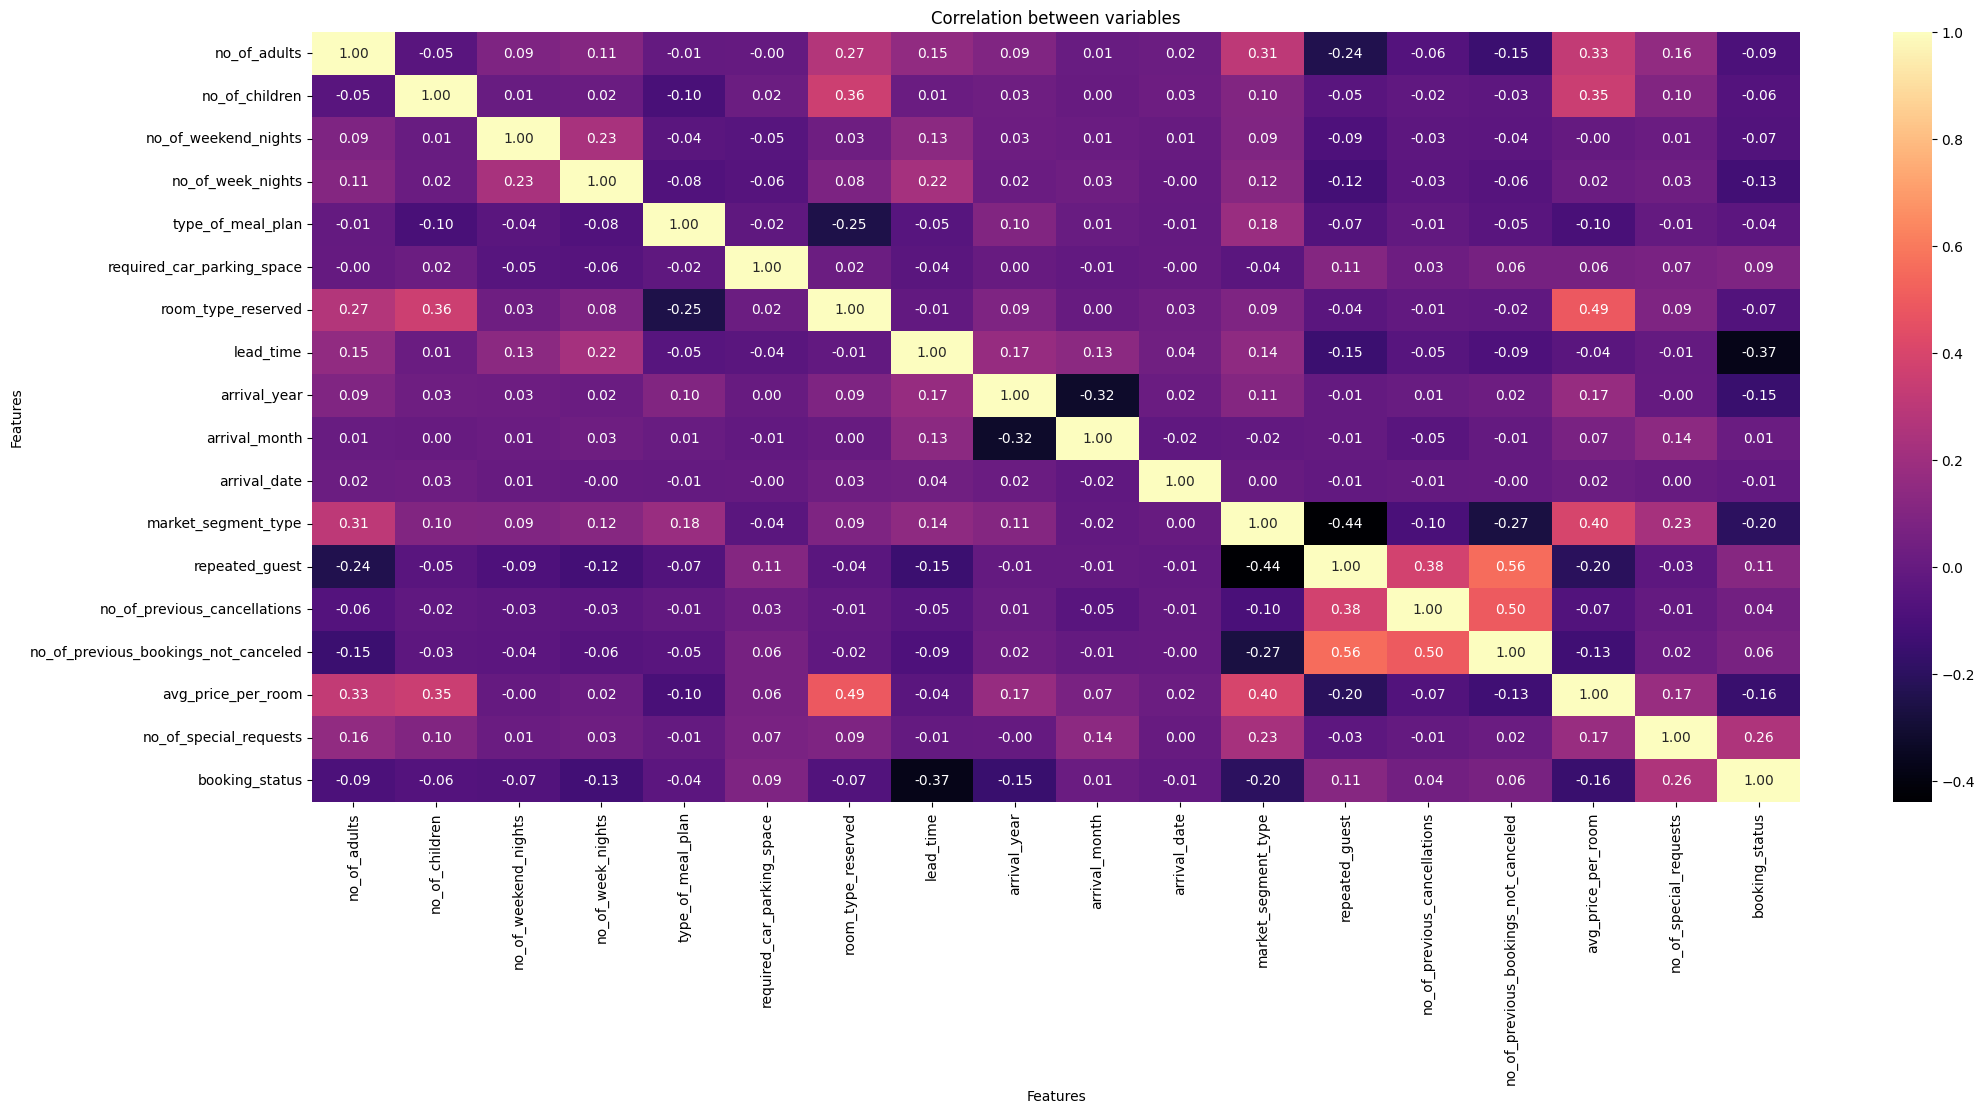

In [23]:
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="magma", fmt=".2f")
plt.gca().set_title("Correlation between variables")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


#### Correlation outcome 
     1.repeated guest / no_of_previous_bookings_not_cancelled
     2.no_of_previous_cancellations / no_of_previous_bookings_not_cancelled
     3.room type reserved / avg price per room
     4.no_of_children / avg_price_per_room 

### Spliting to X and Y

In [24]:
X = df.drop("booking_status", axis=1)
y = df["booking_status"]

### Train and Test spliting

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


### Applying standard scaler

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


### Reducing the number of features

In [27]:
from sklearn.feature_selection import f_classif,SelectKBest
F_values = f_classif(X,y)[0]
print(F_values)

[2.28242357e+02 1.05147812e+02 1.35282540e+02 4.25675287e+02
 3.20834528e+01 1.98410115e+02 1.38901049e+02 4.16182478e+03
 6.16705951e+02 4.16062097e+00 4.52433617e+00 1.05399128e+03
 3.31803069e+02 4.04462738e+01 1.07957481e+02 6.47570832e+02
 1.84800853e+03]


In [28]:
k = len([num for num in F_values if num > 500])

selector = SelectKBest(f_classif, k=k)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)
columns = X.columns[selector.get_support(indices=True)].tolist()

In [29]:
print('Data with selected features')
print(columns)

Data with selected features
['lead_time', 'arrival_year', 'market_segment_type', 'avg_price_per_room', 'no_of_special_requests']


### Data oversampling

<Axes: xlabel='booking_status', ylabel='count'>

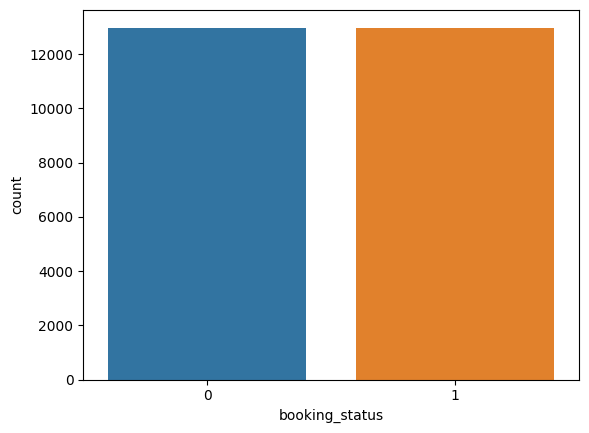

In [30]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=42)
x_train, y_train = oversample.fit_resample(x_train_selected, y_train)
sns.countplot(x=y_train)

### Finding best model through GridSearch

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
models = []
models_comparison = {}

parameters = {
    "max_depth": [4, 5, 6, 7, 9, 10],
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
}
tmp_model = DecisionTreeClassifier(random_state=42)
tmp_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter=50, n_jobs=-1, scoring="f1", cv=5
)
models.append(tmp_model_random)

parameters = {
    "max_depth": [4, 5, 6, 7, 9, 10],
    "criterion": ["gini", "entropy"],
}
tmp_model = RandomForestClassifier(random_state=42)
tmp_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter=25, n_jobs=-1, scoring="f1", cv=5
)
models.append(tmp_model_random)

parameters = {
    "weights": ["uniform", "distance"],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
}
tmp_model = KNeighborsClassifier()
tmp_model_random = RandomizedSearchCV(
    tmp_model, parameters, n_iter=50, n_jobs=-1, scoring="f1", cv=5
)
models.append(tmp_model_random)


### Model Training

In [32]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score
i = 0
model_names = [
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "KNeighborsClassifier",
]

for model in models:
    print(f"Model: {model_names[i]}\n")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test_selected)
    print(classification_report(y_test, y_pred))
    print("-" * 30, "\n")
    models_comparison[f"{model_names[i]}"] = [
        accuracy_score(y_pred, y_test),
        f1_score(y_pred, y_test),
        precision_score(y_pred, y_test),
        recall_score(y_pred, y_test),
    ]
    i += 1

Model: DecisionTreeClassifier



/Users/inyourdream/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.67      0.74      0.71      2227
           1       0.89      0.86      0.87      5573

    accuracy                           0.82      7800
   macro avg       0.78      0.80      0.79      7800
weighted avg       0.83      0.82      0.83      7800

------------------------------ 

Model: RandomForestClassifier



/Users/inyourdream/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=25. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.71      0.75      0.73      2227
           1       0.90      0.88      0.89      5573

    accuracy                           0.84      7800
   macro avg       0.80      0.81      0.81      7800
weighted avg       0.84      0.84      0.84      7800

------------------------------ 

Model: KNeighborsClassifier



/Users/inyourdream/.pyenv/versions/3.11.0rc2/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=50. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.59      0.73      0.65      2227
           1       0.88      0.80      0.84      5573

    accuracy                           0.78      7800
   macro avg       0.73      0.76      0.74      7800
weighted avg       0.80      0.78      0.78      7800

------------------------------ 



### Model Evaluation

In [34]:
models_com_df = pd.DataFrame(models_comparison).T
models_com_df.columns = [
    "Model Accuracy",
    "Model F1-Score",
    "Precision",
    "Recall",
]
models_com_df = models_com_df.sort_values(by="Model F1-Score", ascending=False)
models_com_df.style.format("{:.2%}").background_gradient(cmap="Blues")

,Model Accuracy,Model F1-Score,Precision,Recall
RandomForestClassifier,84.05%,88.72%,87.80%,89.66%
DecisionTreeClassifier,82.41%,87.45%,85.75%,89.21%
KNeighborsClassifier,77.69%,83.63%,79.74%,87.91%
